In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
remanga = pd.read_csv('./data/raw/remanga_catalog_full.csv')
mangalib = pd.read_csv('./data/raw/mangalib_catalog_titles.csv')
gmanga_matched = pd.read_csv('data/gmanga_matched_remanga_mangalib_ids.csv', sep=';')
gmint_matched = pd.read_csv('data/gmint_matched_remanga_mangalib_ids.csv', sep=';')

In [3]:
remanga.loc[:, 'id'] = list(range(len(remanga)))

In [4]:
gmanga_matched.head(2)

,Unnamed: 0,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,remanga_id_1,n_duplicates_remanga,remanga_id_2,remanga_id_3,mangalib_id,mangalib_id_1,n_duplicates_mangalib
0,0,1,Ван Пис,One Piece,One Piece,Budak Getah / Большой Куш / ワンピース / Один Кусок,1028,489.0,NaN,NaN,NaN,NaN,85.0,NaN,NaN
1,1,2,Наруто,Naruto,Naruto,ナルト,704,507.0,NaN,NaN,NaN,NaN,130.0,NaN,NaN


In [5]:
gmint_matched.head(2)

,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,remanga_id_1,n_duplicates,mangalib_id,mangalib_id_1,n_duplicates_mangalib
0,11,Денег нет!,No money,Okane ga nai,お金がないっ / 午夜情深 / 没有钱,116,9766.0,NaN,NaN,NaN,NaN,NaN
1,18,Проклятие цвета крови,Crimson Spell,Crimson Spell,Kurimuzon Superu/クリムゾン・スペル/緋紅色的魔咒/緋色誘惑,75,10537.0,NaN,NaN,NaN,NaN,NaN


In [6]:
def get_matched(df):
    return df[(~df.remanga_id.isna() | (~df.mangalib_id.isna()))]

In [7]:
len(get_matched(gmint_matched) )/ len(gmint_matched)

0.03771236086701816

In [8]:
len(get_matched(gmanga_matched) )/ len(gmanga_matched)

0.5423728813559322

In [11]:
fetch_valid_ixs = lambda df, col: df[~df[col].isna()][col].tolist()
remanga_matched_ids = []
remanga_matched_ids += fetch_valid_ixs(gmanga_matched, 'remanga_id')
remanga_matched_ids += fetch_valid_ixs(gmanga_matched, 'remanga_id_2')
remanga_matched_ids += fetch_valid_ixs(gmanga_matched, 'remanga_id_3')
remanga_matched_ids += fetch_valid_ixs(gmint_matched, 'remanga_id')
remanga_matched_ids += fetch_valid_ixs(gmint_matched, 'remanga_id_1')

In [12]:
remanga[~remanga.id.isin(remanga_matched_ids)]

,rus_name,en_name,issue_year,avg_rating,total_views,total_votes,type,dir,n_chapters,id
3,Герой иного мнения,Hero with another opinion,2020.0,9.2,458051,111061,Рукомикс,hero-with-another-opinion,9.0,3
7,"Архимаг, который вернулся спустя 4000 лет",The archmage who returned after 4000 years,2020.0,9.0,3786103,684219,Манхва,the-archmage-who-returned-after-4000-years,82.0,7
16,Воин-скелет не смог удержать подземелье,Skeleton Soldier Couldn't Protect the Dungeon,2018.0,9.2,3191592,533681,Манхва,skeleton_soldier_couldnt_protect_the_dungeon,141.0,16
28,Я убил Бессмертного,I Killed The Immortal,2021.0,9.1,74032,17948,Рукомикс,i-killed-the-immortal,3.0,28
29,"Раб ""Б"" ранга","""B"" rank slave",2020.0,7.9,1715203,290731,Манхва,b-rank-slave,58.0,29
...,...,...,...,...,...,...,...,...,...,...
16850,Фея-полукровка,1|2 Fairy!,1985.0,0.0,55,0,Манга,12-fairy,3.0,16850
16862,"Клочки, улитки и щенячьи хвостики",Snips and Snails and Puppy Dog Tails,2012.0,0.0,107,2,Манга,snips-and-snails-and-puppy-dog-tails,6.0,16862
16880,Бронированные защитники справедливости эпохи Х...,Heisei Armored Justice Corps,1992.0,0.0,114,0,Манга,heisei-armored-justice-corps,6.0,16880
16881,Голубое семя,Blue Seed,1992.0,0.0,188,6,Манга,blue-seed,5.0,16881


In [41]:
len(remanga[~remanga.id.isin(remanga_matched_ids)]) / len(remanga)

0.34700278122965855

In [13]:
remanga[~remanga.id.isin(remanga_matched_ids)].to_csv('./data/missing/remanga_exclusive.csv', sep=';')

In [14]:
mangalib_matched_ids = []
mangalib_matched_ids += fetch_valid_ixs(gmanga_matched, 'mangalib_id')
mangalib_matched_ids += fetch_valid_ixs(gmanga_matched, 'mangalib_id_1')
mangalib_matched_ids += fetch_valid_ixs(gmint_matched, 'mangalib_id')
mangalib_matched_ids += fetch_valid_ixs(gmint_matched, 'mangalib_id_1')

In [15]:
mangalib[~mangalib.id.isin(mangalib_matched_ids)]

,id,link,data_id,manga_type,name
2,2,poidyom-gulyat,67688,Руманга,Пойдём гулять!
8,8,bastard-hwang-youngchan,2035,Манхва,Сволочь
9,9,ranker-who-lives-a-second-time,12478,Манхва,"Ранкер, который живет второй раз"
11,11,nan-hao-shang-feng,18406,Маньхуа,Нань Хао и Шан Фэнь
23,23,ag-yeog-uiending-eunjug-eumppun,29916,Манхва,Единственный исход злодейки — смерть
...,...,...,...,...,...
1787,1787,great-sword,13710,Маньхуа,Легендарный бог меча
1788,1788,haikyuu-dj-ano-machi-ni-sunderu-karera-no-koto...,8833,Манга,"О тех, кто живет в том городе"
1793,1793,zhi-zun-kuang-di-xi-tong,35272,Маньхуа,Система Верховного Императора
1796,1796,my-fiance-is-in-love-with-my-little-sister,31862,Манга,Мой жених влюбился в мою младшую сестру


In [42]:
len(mangalib[~mangalib.id.isin(mangalib_matched_ids)]) / len(mangalib)

0.2311111111111111

In [16]:
mangalib[~mangalib.id.isin(mangalib_matched_ids)].to_csv('./data/missing/mangalib.csv', sep=';')

In [17]:
# add number of remanga chapters
cond = ~gmanga_matched.remanga_id.isna()
remanga_ids = gmanga_matched.loc[cond].remanga_id.astype(int)
gmanga_matched.loc[cond, 'remanga_chapters_n'] = remanga.set_index('id').loc[remanga_ids].n_chapters.tolist()

In [23]:
is_num = lambda s: (all(list(map(lambda c: c.isdigit() or c == '.', str(s)))))

chapters_n = gmanga_matched[['chapters_count', 'remanga_chapters_n']]
chapters_n = chapters_n[(chapters_n['chapters_count'].apply(is_num)) & 
                        (chapters_n['remanga_chapters_n'].apply(is_num))].astype(float)

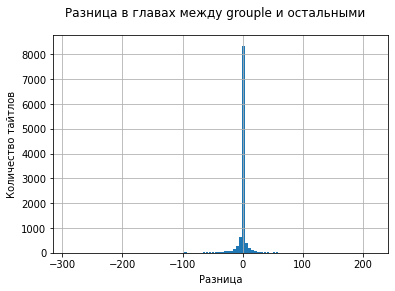

In [26]:
chapters_diff = chapters_n['chapters_count'] - chapters_n['remanga_chapters_n']
CHAPTERS_DIFF = 0
chapters_diff[abs(chapters_diff)>=CHAPTERS_DIFF].hist(bins=100, rwidth=0.9)
plt.suptitle('Разница в главах между grouple и остальными')
plt.xlabel('Разница')
plt.ylabel('Количество тайтлов')
plt.savefig('pics/chapters_diff.png')

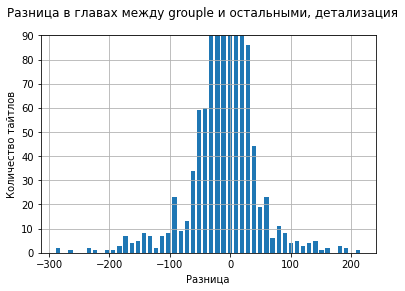

In [40]:
CHAPTERS_DIFF = 0
chapters_diff[abs(chapters_diff)>=CHAPTERS_DIFF].hist(bins=50, rwidth=0.7)
plt.ylim(0, 90)
plt.suptitle('Разница в главах между grouple и остальными, детализация')
plt.xlabel('Разница')
plt.ylabel('Количество тайтлов')
plt.savefig('pics/chapters_diff_detailed.png')